# Clone & Install

In [1]:
!rm -rf HairCLIPv2_UI
!git clone https://github.com/C0untFloyd/HairCLIPv2_UI.git
%cd HairCLIPv2_UI

# Системні пакети (для GUI/відео бекендів OpenCV)
!apt-get -y update && apt-get -y install libgl1-mesa-glx libglib2.0-0

# Python-залежності (без збірки dlib з нуля)
!pip install -U pip setuptools wheel
!pip install ftfy regex tqdm matplotlib opencv-python scikit-image "kornia==0.6.7" "face-alignment==1.3.5" "dlib-bin>=19.24"

# CLIP
!pip install "git+https://github.com/openai/CLIP.git"


Cloning into 'HairCLIPv2_UI'...
remote: Enumerating objects: 206, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 206 (delta 22), reused 24 (delta 14), pack-reused 140 (from 1)
Receiving objects: 100% (206/206), 20.27 MiB | 22.51 MiB/s, done.
Resolving deltas: 100% (37/37), done.
/content/HairCLIPv2_UI
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcont

Init

In [3]:
# 1) Ninja для збірки C++/CUDA-екстеншенів
!pip install --no-cache-dir ninja

# 2) (Опційно, але корисно) Прибрати старі/биті збірки екстеншенів
import os, shutil, pathlib
ext_dir = os.path.expanduser('~/.cache/torch_extensions')
print("Removing:", ext_dir)
shutil.rmtree(ext_dir, ignore_errors=True)


Removing: /root/.cache/torch_extensions


In [5]:
# Встановлюємо системний nvcc + ninja-build (системний)
!apt-get -y update
!apt-get -y install nvidia-cuda-toolkit ninja-build

# Перевірка, що nvcc з’явився
!which nvcc
!nvcc --version

# Прибираємо попередні спроби збірок, щоб PyTorch пересобрав начисто
import os, shutil
shutil.rmtree('/root/.cache/torch_extensions', ignore_errors=True)


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [7]:
!mkdir -p pretrained_models
!pip install -q gdown

# FFHQ StyleGAN (ffhq.pt)
!gdown --fuzzy https://drive.google.com/file/d/1g8S81ZybmrF86OjvjLYJzx-wx83ZOiIw/view?usp=drive_link -O pretrained_models/ffhq.pt
# Face Parse Model (seg.pth)
!gdown --fuzzy https://drive.google.com/file/d/1OG6t7q4PpHOoYNdP-ipoxuqYbfMSgPta/view?usp=drive_link -O pretrained_models/seg.pth
# Face Landmark Model (shape_predictor_68_face_landmarks.dat)
!gdown --fuzzy https://drive.google.com/file/d/1c-SgUUQj0X1mIl-W-_2sMboI2QS7GzfK/view?usp=drive_link -O pretrained_models/shape_predictor_68_face_landmarks.dat
# Bald Proxy (bald_proxy.pt)
!gdown --fuzzy https://drive.google.com/file/d/1sa732uBfX1739MFsvtRCKWCN54zYyltC/view?usp=drive_link -O pretrained_models/bald_proxy.pt
# Sketch Proxy (sketch_proxy.pt)
!gdown --fuzzy https://drive.google.com/file/d/1qk0ZIfA1VmrFUzDJ0g8mK8nx0WtF-5sY/view?usp=drive_link -O pretrained_models/sketch_proxy.pt


Downloading...
From (original): https://drive.google.com/uc?id=1g8S81ZybmrF86OjvjLYJzx-wx83ZOiIw
From (redirected): https://drive.google.com/uc?id=1g8S81ZybmrF86OjvjLYJzx-wx83ZOiIw&confirm=t&uuid=986ae017-797f-4053-be8a-608030f22fbc
To: /content/HairCLIPv2_UI/pretrained_models/ffhq.pt
100% 133M/133M [00:03<00:00, 41.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OG6t7q4PpHOoYNdP-ipoxuqYbfMSgPta
To: /content/HairCLIPv2_UI/pretrained_models/seg.pth
100% 53.3M/53.3M [00:01<00:00, 48.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1c-SgUUQj0X1mIl-W-_2sMboI2QS7GzfK
To: /content/HairCLIPv2_UI/pretrained_models/shape_predictor_68_face_landmarks.dat
100% 99.7M/99.7M [00:01<00:00, 53.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1sa732uBfX1739MFsvtRCKWCN54zYyltC
To: /content/HairCLIPv2_UI/pretrained_models/bald_proxy.pt
100% 8.41M/8.41M [00:00<00:00, 16.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1qk0ZIfA1VmrFUzDJ0g8mK8nx0WtF-5sY
Fr

In [9]:
# Інструменти збірки
!apt-get -y update && apt-get -y install ninja-build build-essential

# Ninja як python-пакет (потрібен саме цей)
!pip install -U --no-cache-dir ninja


Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [10]:
import os, shutil, pathlib

# Куди складати зібрані розширення (уникаємо домашнього кешу)
os.environ['TORCH_EXTENSIONS_DIR'] = '/content/torch_extensions'
os.environ['MAX_JOBS'] = '1'        # інколи паралельна збірка дає гонки
# Якщо у тебе стоїть CUDA Toolkit (див. Крок 3), пропиши точний шлях:
# os.environ['CUDA_HOME'] = '/usr/local/cuda'       # або '/usr/local/cuda-11.8'

# Чистимо ВСІ старі збірки
for p in ('/root/.cache/torch_extensions','/content/torch_extensions'):
    shutil.rmtree(p, ignore_errors=True)

print('TORCH_EXTENSIONS_DIR =', os.environ.get('TORCH_EXTENSIONS_DIR'))


TORCH_EXTENSIONS_DIR = /content/torch_extensions


In [11]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = str(0)
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
from scripts.Embedding import Embedding
from scripts.text_proxy import TextProxy
from scripts.ref_proxy import RefProxy
from scripts.sketch_proxy import SketchProxy
from scripts.bald_proxy import BaldProxy
from scripts.color_proxy import ColorProxy
from scripts.feature_blending import hairstyle_feature_blending
from utils.seg_utils import vis_seg
from utils.mask_ui import painting_mask
from utils.image_utils import display_image_list, process_display_input
from utils.model_utils import load_base_models
from utils.options import Options

opts = Options().parse(jupyter=True)
src_name = '168125'# source image name you want to edit

image_transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
g_ema, mean_latent_code, seg = load_base_models(opts)
ii2s = Embedding(opts, g_ema, mean_latent_code[0,0])
if not os.path.isfile(os.path.join(opts.src_latent_dir, f"{src_name}.npz")):
    inverted_latent_w_plus, inverted_latent_F = ii2s.invert_image_in_FS(image_path=f'{opts.src_img_dir}/{src_name}.jpg')
    save_latent_path = os.path.join(opts.src_latent_dir, f'{src_name}.npz')
    np.savez(save_latent_path, latent_in=inverted_latent_w_plus.detach().cpu().numpy(),
                latent_F=inverted_latent_F.detach().cpu().numpy())
src_latent = torch.from_numpy(np.load(f'{opts.src_latent_dir}/{src_name}.npz')['latent_in']).cuda()
src_feature = torch.from_numpy(np.load(f'{opts.src_latent_dir}/{src_name}.npz')['latent_F']).cuda()
src_image = image_transform(Image.open(f'{opts.src_img_dir}/{src_name}.jpg').convert('RGB')).unsqueeze(0).cuda()
input_mask = torch.argmax(seg(src_image)[1], dim=1).long().clone().detach()

bald_proxy = BaldProxy(g_ema, opts.bald_path)
text_proxy = TextProxy(opts, g_ema, seg, mean_latent_code)
ref_proxy = RefProxy(opts, g_ema, seg, ii2s)
sketch_proxy = SketchProxy(g_ema, mean_latent_code, opts.sketch_path)
color_proxy = ColorProxy(opts, g_ema, seg)

edited_hairstyle_img = src_image
def hairstyle_editing(global_cond=None, local_sketch=False, paint_the_mask=False, \
                      src_latent=src_latent, src_feature=src_feature, input_mask=input_mask, src_image=src_image, \
                        latent_global=None, latent_local=None, latent_bald=None, local_blending_mask=None, painted_mask=None):
    if paint_the_mask:
        modified_mask = painting_mask(input_mask)
        input_mask = torch.from_numpy(modified_mask).unsqueeze(0).cuda().long().clone().detach()
        vis_modified_mask = vis_seg(modified_mask)
        display_image_list([src_image, vis_modified_mask])
        painted_mask = input_mask

    if local_sketch:
        latent_local, local_blending_mask, visual_local_list = sketch_proxy(input_mask)
        display_image_list(visual_local_list)

    if global_cond is not None:
        assert isinstance(global_cond, str)
        latent_bald, visual_bald_list = bald_proxy(src_latent)
        display_image_list(visual_bald_list)

        if global_cond.endswith('.jpg') or global_cond.endswith('.png'):
            latent_global, visual_global_list = ref_proxy(global_cond, src_image, painted_mask=painted_mask)
        else:
            latent_global, visual_global_list = text_proxy(global_cond, src_image, from_mean=True, painted_mask=painted_mask)
        display_image_list(visual_global_list)

    src_feature, edited_hairstyle_img = hairstyle_feature_blending(g_ema, seg, src_latent, src_feature, input_mask, latent_bald=latent_bald,\
                                                latent_global=latent_global, latent_local=latent_local, local_blending_mask=local_blending_mask)
    return src_feature, edited_hairstyle_img


W0909 16:03:45.331000 7916 torch/utils/cpp_extension.py:2425] TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
W0909 16:03:45.331000 7916 torch/utils/cpp_extension.py:2425] If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'] to specific architectures.
W0909 16:04:49.135000 7916 torch/utils/cpp_extension.py:2425] TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
W0909 16:04:49.135000 7916 torch/utils/cpp_extension.py:2425] If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'] to specific architectures.


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 213MB/s]


Setting up Perceptual loss...


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:03<00:00, 155MB/s]


Loading model from: /content/HairCLIPv2_UI/criteria/lpips/weights/v0.1/vgg.pth
...[net-lin [vgg]] initialized
...Done


100%|███████████████████████████████████████| 338M/338M [00:24<00:00, 14.7MiB/s]


Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth


100%|██████████| 85.7M/85.7M [00:00<00:00, 199MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/3DFAN4-4a694010b9.zip" to /root/.cache/torch/hub/checkpoints/3DFAN4-4a694010b9.zip
100%|██████████| 91.9M/91.9M [00:00<00:00, 123MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/depth-6c4283c0e0.zip" to /root/.cache/torch/hub/checkpoints/depth-6c4283c0e0.zip
100%|██████████| 224M/224M [00:01<00:00, 174MB/s]


Setting up Perceptual loss...
Loading model from: /content/HairCLIPv2_UI/criteria/lpips/weights/v0.1/vgg.pth
...[net-lin [vgg]] initialized
...Done


# Hairstyle Edit

text_loss: 0.8069;: 100%|██████████| 200/200 [00:58<00:00,  3.41it/s]


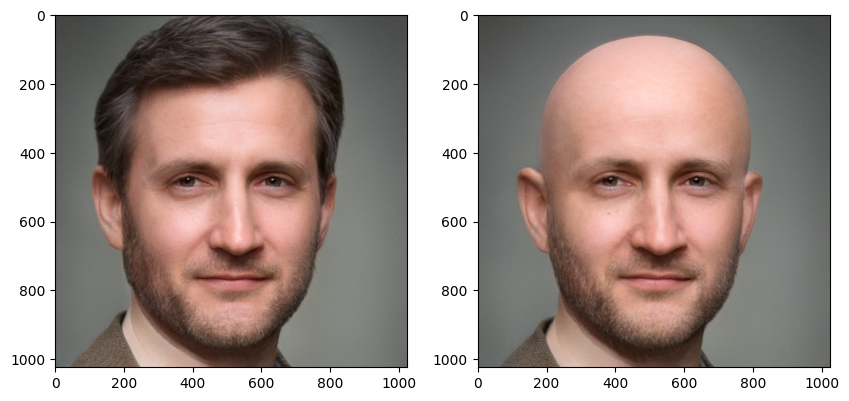

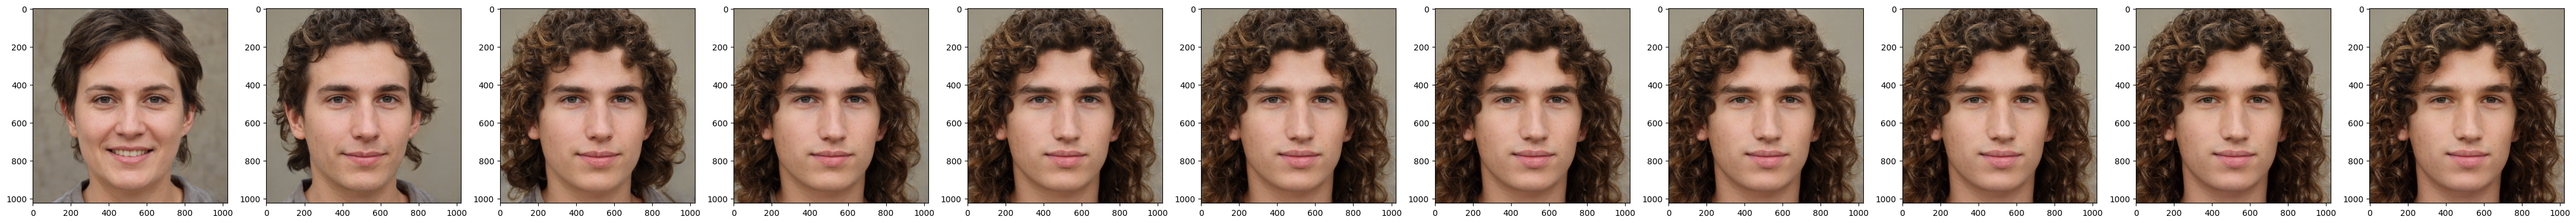

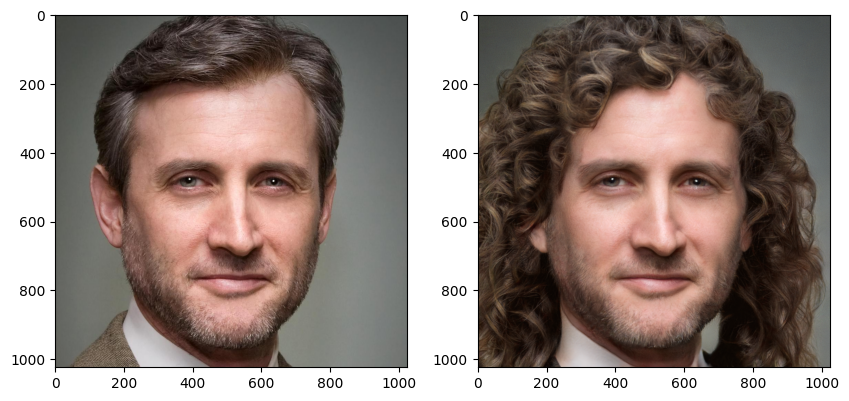

In [13]:
#global_cond: e.g. 'bowl cut hairstyle' for text_mode; '058728.jpg' for ref_mode
src_feature, edited_hairstyle_img = hairstyle_editing(global_cond='Long, curly hair', local_sketch=False, paint_the_mask=False)
display_image_list([process_display_input(src_image), process_display_input(edited_hairstyle_img)])

# Color Edit

In [ ]:
color_cond = '108157.jpg' #e.g. 'red hair' for text_mode; '108157.jpg' for ref_mode; (220,220,220) for RGB value mode

visual_color_list, visual_final_list = color_proxy(color_cond, edited_hairstyle_img, src_latent, src_feature)
display_image_list(visual_color_list)
display_image_list(visual_final_list)